In [1]:
#HALF WED, HALF FRI

#TODO: Include weather data in dataset
#TODO: Add custom callbacks (Model Checkpoint and Early Stopping and learning rate)
#TODO: Check current model hyperparams (Gridsearch-like process)

#Plot prediction !!!!!!!!!!! (true vs test + train) (HYBRID+SVR)
#weather points -> TURBIDITY -> fine tune model

#TRAINING MAE 

#Phil sent script for solar enegrgy


#SCALE HYBRID DATA

#Don't put day into traning
#Cehck for outliers in weather
#Read how much past data affects cellcount/turbidity (suggest-lag of 6 (1hr 30 mins))


#__________________________________________

#plot train + test together time order
#add cross validation k fold (5 folds)
#RMSE metric
#SAVE RESULTS OF PREDICTION



#set out setions in final report

#save graphs (do weather test and no weather test) EMAIL PPT TO MAIRA AND RACHEL AND PRINT

In [2]:
import numpy as np
import pandas as pd
import os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split, KFold
from sklearn.metrics import mean_squared_error


import tensorflow.keras as keras


In [3]:
df = pd.read_csv(os.path.join("data", "final_df.csv"))

In [4]:
df['Date 2'] = pd.to_datetime(df['Date 2']) 
df['Day'] = (df['Date 2'] - df['Date 2'].min())  / np.timedelta64(1,'D')
df_no_date = df.drop(columns=['Date 1', 'Date 2', 'Date'])

x_arr = np.array(df_no_date.drop(columns=['cell count']), np.float32)
x_shaped = x_arr.reshape(x_arr.shape[0], 1, x_arr.shape[1])

y_shaped = df_no_date['cell count'].values

kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(x_shaped)

print(kf)


KFold(n_splits=5, random_state=None, shuffle=True)


In [5]:
model = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[None, x_shaped.shape[2]]),
    keras.layers.GRU(144, return_sequences=True, activation='relu'),
    keras.layers.Reshape(target_shape=(12,12)),
    keras.layers.Conv1D(filters=128, kernel_size=4, strides=1, padding='same',activation='relu'),
    keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    keras.layers.MaxPooling1D((2), strides=None),
    keras.layers.AveragePooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8, ),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 100)         35700     
                                                                 
 gru_1 (GRU)                 (None, None, 144)         106272    
                                                                 
 reshape (Reshape)           (None, 12, 12)            0         
                                                                 
 conv1d (Conv1D)             (None, 12, 128)           6272      
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            32832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 64)            0         
 )                                                               
                                                        

In [6]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00010),  
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()]
        )

In [7]:
models = []
histories = []  
model_evals = []
for train_index, test_index in kf.split(x_shaped):
    x_train, x_test = x_shaped[train_index], x_shaped[test_index]
    y_train, y_test = y_shaped[train_index], y_shaped[test_index]

    history = model.fit(x_train,y_train,epochs=200)
    
    model_eval = model.evaluate(x_test, y_test)
    models.append(model)
    histories.append(history)
    model_evals.append(model_eval)
        

Epoch 1/200
4/4 [==============================] - 3s 6ms/step - loss: 10950.4932 - root_mean_squared_error: 104.6446
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 10927.2578 - root_mean_squared_error: 104.5335
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 10907.3877 - root_mean_squared_error: 104.4384
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 10886.9111 - root_mean_squared_error: 104.3404
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 10864.9805 - root_mean_squared_error: 104.2352
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 10840.8203 - root_mean_squared_error: 104.1193
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 10814.7373 - root_mean_squared_error: 103.9939
Epoch 8/200
4/4 [==============================] - 0s 8ms/step - loss: 10785.3154 - root_mean_squared_error: 103.8524
Epoch 9/200
4/4 [==============================] - 0s 7m

4/4 [==============================] - 0s 4ms/step - loss: 1204.9805 - root_mean_squared_error: 34.7128
Epoch 71/200
4/4 [==============================] - 0s 4ms/step - loss: 1197.6876 - root_mean_squared_error: 34.6076
Epoch 72/200
4/4 [==============================] - 0s 4ms/step - loss: 1185.3535 - root_mean_squared_error: 34.4290
Epoch 73/200
4/4 [==============================] - 0s 4ms/step - loss: 1175.2739 - root_mean_squared_error: 34.2823
Epoch 74/200
4/4 [==============================] - 0s 4ms/step - loss: 1162.3127 - root_mean_squared_error: 34.0927
Epoch 75/200
4/4 [==============================] - 0s 4ms/step - loss: 1152.8582 - root_mean_squared_error: 33.9538
Epoch 76/200
4/4 [==============================] - 0s 5ms/step - loss: 1154.0648 - root_mean_squared_error: 33.9715
Epoch 77/200
4/4 [==============================] - 0s 4ms/step - loss: 1145.0557 - root_mean_squared_error: 33.8387
Epoch 78/200
4/4 [==============================] - 0s 4ms/step - loss: 1146.

4/4 [==============================] - 0s 4ms/step - loss: 583.2258 - root_mean_squared_error: 24.1501
Epoch 141/200
4/4 [==============================] - 0s 5ms/step - loss: 577.0674 - root_mean_squared_error: 24.0222
Epoch 142/200
4/4 [==============================] - 0s 5ms/step - loss: 580.2544 - root_mean_squared_error: 24.0885
Epoch 143/200
4/4 [==============================] - 0s 4ms/step - loss: 565.0770 - root_mean_squared_error: 23.7713
Epoch 144/200
4/4 [==============================] - 0s 5ms/step - loss: 558.2755 - root_mean_squared_error: 23.6279
Epoch 145/200
4/4 [==============================] - 0s 4ms/step - loss: 555.7372 - root_mean_squared_error: 23.5741
Epoch 146/200
4/4 [==============================] - 0s 5ms/step - loss: 549.9913 - root_mean_squared_error: 23.4519
Epoch 147/200
4/4 [==============================] - 0s 5ms/step - loss: 549.8027 - root_mean_squared_error: 23.4479
Epoch 148/200
4/4 [==============================] - 0s 4ms/step - loss: 535.9

4/4 [==============================] - 0s 4ms/step - loss: 490.8100 - root_mean_squared_error: 22.1542
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 490.1131 - root_mean_squared_error: 22.1385
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 483.0830 - root_mean_squared_error: 21.9791
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 475.9111 - root_mean_squared_error: 21.8154
Epoch 13/200
4/4 [==============================] - 0s 5ms/step - loss: 469.8691 - root_mean_squared_error: 21.6765
Epoch 14/200
4/4 [==============================] - 0s 4ms/step - loss: 472.1414 - root_mean_squared_error: 21.7288
Epoch 15/200
4/4 [==============================] - 0s 5ms/step - loss: 461.6566 - root_mean_squared_error: 21.4862
Epoch 16/200
4/4 [==============================] - 0s 4ms/step - loss: 465.4307 - root_mean_squared_error: 21.5738
Epoch 17/200
4/4 [==============================] - 0s 4ms/step - loss: 465.1850 - ro

4/4 [==============================] - 0s 5ms/step - loss: 366.1032 - root_mean_squared_error: 19.1338
Epoch 80/200
4/4 [==============================] - 0s 5ms/step - loss: 369.2201 - root_mean_squared_error: 19.2151
Epoch 81/200
4/4 [==============================] - 0s 5ms/step - loss: 366.2564 - root_mean_squared_error: 19.1378
Epoch 82/200
4/4 [==============================] - 0s 4ms/step - loss: 363.8755 - root_mean_squared_error: 19.0755
Epoch 83/200
4/4 [==============================] - 0s 5ms/step - loss: 374.8991 - root_mean_squared_error: 19.3623
Epoch 84/200
4/4 [==============================] - 0s 4ms/step - loss: 362.5946 - root_mean_squared_error: 19.0419
Epoch 85/200
4/4 [==============================] - 0s 5ms/step - loss: 357.3080 - root_mean_squared_error: 18.9026
Epoch 86/200
4/4 [==============================] - 0s 4ms/step - loss: 364.1707 - root_mean_squared_error: 19.0833
Epoch 87/200
4/4 [==============================] - 0s 4ms/step - loss: 362.0108 - ro

4/4 [==============================] - 0s 5ms/step - loss: 314.1844 - root_mean_squared_error: 17.7252
Epoch 150/200
4/4 [==============================] - 0s 5ms/step - loss: 310.2632 - root_mean_squared_error: 17.6143
Epoch 151/200
4/4 [==============================] - 0s 4ms/step - loss: 314.5101 - root_mean_squared_error: 17.7344
Epoch 152/200
4/4 [==============================] - 0s 5ms/step - loss: 312.3749 - root_mean_squared_error: 17.6741
Epoch 153/200
4/4 [==============================] - 0s 5ms/step - loss: 308.9067 - root_mean_squared_error: 17.5757
Epoch 154/200
4/4 [==============================] - 0s 5ms/step - loss: 313.4758 - root_mean_squared_error: 17.7052
Epoch 155/200
4/4 [==============================] - 0s 5ms/step - loss: 318.0816 - root_mean_squared_error: 17.8348
Epoch 156/200
4/4 [==============================] - 0s 5ms/step - loss: 313.9180 - root_mean_squared_error: 17.7177
Epoch 157/200
4/4 [==============================] - 0s 5ms/step - loss: 308.3

4/4 [==============================] - 0s 4ms/step - loss: 324.7431 - root_mean_squared_error: 18.0206
Epoch 19/200
4/4 [==============================] - 0s 5ms/step - loss: 323.8194 - root_mean_squared_error: 17.9950
Epoch 20/200
4/4 [==============================] - 0s 5ms/step - loss: 321.1222 - root_mean_squared_error: 17.9199
Epoch 21/200
4/4 [==============================] - 0s 4ms/step - loss: 315.8328 - root_mean_squared_error: 17.7717
Epoch 22/200
4/4 [==============================] - 0s 4ms/step - loss: 326.8259 - root_mean_squared_error: 18.0783
Epoch 23/200
4/4 [==============================] - 0s 5ms/step - loss: 323.9612 - root_mean_squared_error: 17.9989
Epoch 24/200
4/4 [==============================] - 0s 4ms/step - loss: 325.4146 - root_mean_squared_error: 18.0393
Epoch 25/200
4/4 [==============================] - 0s 5ms/step - loss: 323.7870 - root_mean_squared_error: 17.9941
Epoch 26/200
4/4 [==============================] - 0s 4ms/step - loss: 313.6584 - ro

4/4 [==============================] - 0s 5ms/step - loss: 276.6438 - root_mean_squared_error: 16.6326
Epoch 89/200
4/4 [==============================] - 0s 5ms/step - loss: 276.7196 - root_mean_squared_error: 16.6349
Epoch 90/200
4/4 [==============================] - 0s 5ms/step - loss: 272.1875 - root_mean_squared_error: 16.4981
Epoch 91/200
4/4 [==============================] - 0s 5ms/step - loss: 272.3359 - root_mean_squared_error: 16.5026
Epoch 92/200
4/4 [==============================] - 0s 5ms/step - loss: 272.8170 - root_mean_squared_error: 16.5172
Epoch 93/200
4/4 [==============================] - 0s 5ms/step - loss: 269.2701 - root_mean_squared_error: 16.4095
Epoch 94/200
4/4 [==============================] - 0s 5ms/step - loss: 287.2959 - root_mean_squared_error: 16.9498
Epoch 95/200
4/4 [==============================] - 0s 5ms/step - loss: 276.7251 - root_mean_squared_error: 16.6351
Epoch 96/200
4/4 [==============================] - 0s 6ms/step - loss: 271.3496 - ro

4/4 [==============================] - 0s 5ms/step - loss: 241.2955 - root_mean_squared_error: 15.5337
Epoch 159/200
4/4 [==============================] - 0s 4ms/step - loss: 240.8727 - root_mean_squared_error: 15.5201
Epoch 160/200
4/4 [==============================] - 0s 4ms/step - loss: 256.3466 - root_mean_squared_error: 16.0108
Epoch 161/200
4/4 [==============================] - 0s 4ms/step - loss: 237.0712 - root_mean_squared_error: 15.3971
Epoch 162/200
4/4 [==============================] - 0s 4ms/step - loss: 244.4824 - root_mean_squared_error: 15.6359
Epoch 163/200
4/4 [==============================] - 0s 5ms/step - loss: 237.0370 - root_mean_squared_error: 15.3960
Epoch 164/200
4/4 [==============================] - 0s 4ms/step - loss: 240.6032 - root_mean_squared_error: 15.5114
Epoch 165/200
4/4 [==============================] - 0s 5ms/step - loss: 237.5417 - root_mean_squared_error: 15.4124
Epoch 166/200
4/4 [==============================] - 0s 4ms/step - loss: 239.4

4/4 [==============================] - 0s 5ms/step - loss: 254.2788 - root_mean_squared_error: 15.9461
Epoch 28/200
4/4 [==============================] - 0s 5ms/step - loss: 265.1651 - root_mean_squared_error: 16.2839
Epoch 29/200
4/4 [==============================] - 0s 5ms/step - loss: 260.9091 - root_mean_squared_error: 16.1527
Epoch 30/200
4/4 [==============================] - 0s 4ms/step - loss: 260.1135 - root_mean_squared_error: 16.1280
Epoch 31/200
4/4 [==============================] - 0s 5ms/step - loss: 263.0455 - root_mean_squared_error: 16.2187
Epoch 32/200
4/4 [==============================] - 0s 6ms/step - loss: 251.0153 - root_mean_squared_error: 15.8435
Epoch 33/200
4/4 [==============================] - 0s 9ms/step - loss: 261.1727 - root_mean_squared_error: 16.1608
Epoch 34/200
4/4 [==============================] - 0s 7ms/step - loss: 251.7196 - root_mean_squared_error: 15.8657
Epoch 35/200
4/4 [==============================] - 0s 8ms/step - loss: 256.7654 - ro

4/4 [==============================] - 0s 4ms/step - loss: 219.4869 - root_mean_squared_error: 14.8151
Epoch 98/200
4/4 [==============================] - 0s 5ms/step - loss: 224.0210 - root_mean_squared_error: 14.9673
Epoch 99/200
4/4 [==============================] - 0s 4ms/step - loss: 216.0982 - root_mean_squared_error: 14.7003
Epoch 100/200
4/4 [==============================] - 0s 4ms/step - loss: 216.0411 - root_mean_squared_error: 14.6983
Epoch 101/200
4/4 [==============================] - 0s 4ms/step - loss: 224.6054 - root_mean_squared_error: 14.9868
Epoch 102/200
4/4 [==============================] - 0s 4ms/step - loss: 222.8186 - root_mean_squared_error: 14.9271
Epoch 103/200
4/4 [==============================] - 0s 4ms/step - loss: 215.9950 - root_mean_squared_error: 14.6968
Epoch 104/200
4/4 [==============================] - 0s 4ms/step - loss: 221.5244 - root_mean_squared_error: 14.8837
Epoch 105/200
4/4 [==============================] - 0s 4ms/step - loss: 218.170

4/4 [==============================] - 0s 4ms/step - loss: 192.7257 - root_mean_squared_error: 13.8826
Epoch 168/200
4/4 [==============================] - 0s 4ms/step - loss: 188.7643 - root_mean_squared_error: 13.7392
Epoch 169/200
4/4 [==============================] - 0s 5ms/step - loss: 193.4813 - root_mean_squared_error: 13.9098
Epoch 170/200
4/4 [==============================] - 0s 4ms/step - loss: 193.0304 - root_mean_squared_error: 13.8935
Epoch 171/200
4/4 [==============================] - 0s 4ms/step - loss: 193.5072 - root_mean_squared_error: 13.9107
Epoch 172/200
4/4 [==============================] - 0s 4ms/step - loss: 189.5929 - root_mean_squared_error: 13.7693
Epoch 173/200
4/4 [==============================] - 0s 4ms/step - loss: 197.0603 - root_mean_squared_error: 14.0378
Epoch 174/200
4/4 [==============================] - 0s 4ms/step - loss: 192.3409 - root_mean_squared_error: 13.8687
Epoch 175/200
4/4 [==============================] - 0s 4ms/step - loss: 186.0

4/4 [==============================] - 0s 4ms/step - loss: 179.2971 - root_mean_squared_error: 13.3902
Epoch 37/200
4/4 [==============================] - 0s 4ms/step - loss: 177.9521 - root_mean_squared_error: 13.3399
Epoch 38/200
4/4 [==============================] - 0s 4ms/step - loss: 176.6070 - root_mean_squared_error: 13.2894
Epoch 39/200
4/4 [==============================] - 0s 4ms/step - loss: 182.8910 - root_mean_squared_error: 13.5237
Epoch 40/200
4/4 [==============================] - 0s 4ms/step - loss: 177.5861 - root_mean_squared_error: 13.3261
Epoch 41/200
4/4 [==============================] - 0s 4ms/step - loss: 186.3911 - root_mean_squared_error: 13.6525
Epoch 42/200
4/4 [==============================] - 0s 4ms/step - loss: 177.6902 - root_mean_squared_error: 13.3300
Epoch 43/200
4/4 [==============================] - 0s 4ms/step - loss: 176.1232 - root_mean_squared_error: 13.2711
Epoch 44/200
4/4 [==============================] - 0s 4ms/step - loss: 176.3486 - ro

4/4 [==============================] - 0s 4ms/step - loss: 165.5213 - root_mean_squared_error: 12.8655
Epoch 107/200
4/4 [==============================] - 0s 4ms/step - loss: 165.7663 - root_mean_squared_error: 12.8750
Epoch 108/200
4/4 [==============================] - 0s 4ms/step - loss: 164.3394 - root_mean_squared_error: 12.8195
Epoch 109/200
4/4 [==============================] - 0s 4ms/step - loss: 166.0321 - root_mean_squared_error: 12.8853
Epoch 110/200
4/4 [==============================] - 0s 4ms/step - loss: 165.0750 - root_mean_squared_error: 12.8482
Epoch 111/200
4/4 [==============================] - 0s 4ms/step - loss: 171.8187 - root_mean_squared_error: 13.1080
Epoch 112/200
4/4 [==============================] - 0s 4ms/step - loss: 157.8767 - root_mean_squared_error: 12.5649
Epoch 113/200
4/4 [==============================] - 0s 4ms/step - loss: 158.1199 - root_mean_squared_error: 12.5746
Epoch 114/200
4/4 [==============================] - 0s 4ms/step - loss: 161.4

4/4 [==============================] - 0s 4ms/step - loss: 154.9138 - root_mean_squared_error: 12.4464
Epoch 177/200
4/4 [==============================] - 0s 4ms/step - loss: 150.3878 - root_mean_squared_error: 12.2633
Epoch 178/200
4/4 [==============================] - 0s 4ms/step - loss: 150.0490 - root_mean_squared_error: 12.2494
Epoch 179/200
4/4 [==============================] - 0s 4ms/step - loss: 157.9138 - root_mean_squared_error: 12.5664
Epoch 180/200
4/4 [==============================] - 0s 4ms/step - loss: 152.8719 - root_mean_squared_error: 12.3641
Epoch 181/200
4/4 [==============================] - 0s 4ms/step - loss: 148.3523 - root_mean_squared_error: 12.1800
Epoch 182/200
4/4 [==============================] - 0s 4ms/step - loss: 144.4924 - root_mean_squared_error: 12.0205
Epoch 183/200
4/4 [==============================] - 0s 4ms/step - loss: 163.2369 - root_mean_squared_error: 12.7764
Epoch 184/200
4/4 [==============================] - 0s 4ms/step - loss: 146.1

In [8]:
#check which is best
model_evals

[[1031.1314697265625, 32.111236572265625],
 [437.5929260253906, 20.91872215270996],
 [484.47650146484375, 22.010826110839844],
 [350.0726318359375, 18.710227966308594],
 [169.12908935546875, 13.004963874816895]]

In [9]:
best_loc = model_evals.index(min(model_evals))
best_model = models[best_loc]
best_history = histories[best_loc]
best_eval = model_evals[best_loc]

In [10]:
best_history.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

In [11]:

test_loss = best_eval[0]
test_rmse = best_eval[1]

now = dt.datetime.now().strftime("%Y-%m-%d %H-%M")

In [12]:
def check_file(fpath):
    return os.path.exists(fpath)

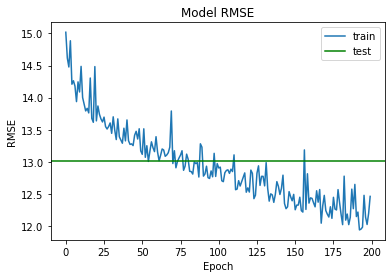

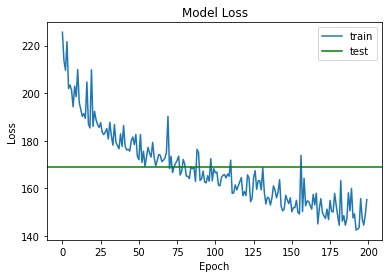

In [13]:
plt.plot(best_history.history['root_mean_squared_error'], label='train')
plt.axhline(test_rmse, color='g', label='test')
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model RMSE vs Epoch" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

plt.plot(best_history.history['loss'], label='train')
plt.axhline(test_loss, color='g', label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model Loss vs Epoch" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

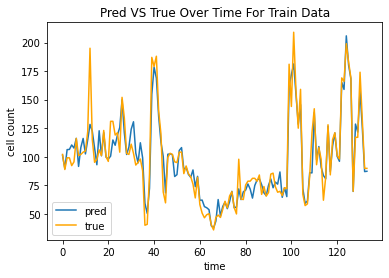

In [14]:
pred = best_model.predict(x_shaped)

plt.plot(pred, label='pred')
plt.plot(y_shaped, color='orange', label='true')
plt.title('Pred VS True Over Time For Train Data')
plt.ylabel('cell count')
plt.xlabel('time')
plt.legend()
fpath = os.path.join("plots", now + " Overall Acc Predicted and True vs Time" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()
